In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = [_ for _ in range(10)]
y = [5*(x+np.random.randint(-100, 100)/50) + 7 - np.random.randint(10, 50)/10 for x in x]

red line MSE: 769.22
yellow line MSE: 92.26
green line MSE: 15.48


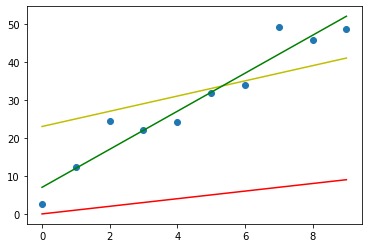

In [38]:
sample_lines = [{'plot': [x for x in x], 'col': 'r', 'mse': 0.1*sum([(y[idx] - x[idx])**2 for idx in range(10)])}, 
                {'plot': [2*x +23 for x in x], 'col': 'y', 'mse': 0.1*sum([(y[idx] - (2*x[idx]+23))**2 for idx in range(10)])}, 
                {'plot': [5*x+7 for x in x], 'col': 'g', 'mse': 0.1*sum([(y[idx] - (5*x[idx]+7))**2 for idx in range(10)])}]
mapping = {'r': 'red line', 'y': 'yellow line', 'g': 'green line'}
plt.scatter(x, y)
for sample_line in sample_lines:
    plt.plot(sample_line['plot'], sample_line['col'])
    print(mapping[sample_line['col']], 'MSE:', round(sample_line['mse'], 2))

In [22]:
pd.concat([pd.Series(x, name='x'), pd.Series(y, name='y')], axis=1)

,x,y
0,0,-4.9
1,1,4.6
2,2,12.2
3,3,26.3
4,4,19.4
5,5,30.5
6,6,43.9
7,7,32.9
8,8,35.6
9,9,43.9


In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.asarray(x).reshape(-1, 1), np.asarray(y).reshape(-1, 1))

LinearRegression()

In [43]:
y_pred = model.predict(np.asarray(x).reshape(-1, 1))

Sklearn LinearRegression() MSE: 15.44
Our best "model" MSE: 15.48


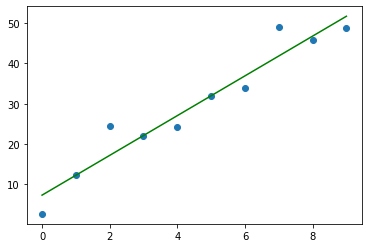

In [50]:
plt.scatter(x, y)
plt.plot(y_pred, 'g')
print('Sklearn LinearRegression() MSE:', round(0.1*sum([(y[idx] - y_pred[idx])**2 for idx in range(10)])[0], 2))
print('Our best \"model\" MSE:', round(0.1*sum([(y[idx] - (5*x[idx]+7))**2 for idx in range(10)]), 2))